# Remoção dos dados Faltantes na base de dados e filtro

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('dados_poscomp_completo.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14719 entries, 0 to 14718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            14719 non-null  object 
 1   sexo             14719 non-null  object 
 2   estado           14719 non-null  object 
 3   presença         14719 non-null  object 
 4   cargo            14719 non-null  object 
 5   especialidade    14719 non-null  object 
 6   matematica       14579 non-null  float64
 7   fund_computacao  14579 non-null  float64
 8   tec_computacao   14579 non-null  float64
 9   ano              14719 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB


In [4]:
dados.dropna(inplace=True)

In [5]:
dados[dados['matematica'] < 5]

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016
6,1985-02-23,masculino,pb,n,mestrado/doutorado,sistemas de computação,0.0,0.0,0.0,2016
9,1965-12-06,masculino,sp,n,mestrado/doutorado,robótica,0.0,0.0,0.0,2016
13,1974-05-24,masculino,sp,n,mestrado/doutorado,sistemas de computação,0.0,0.0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...
14687,1995-10-18,masculino,sp,s,mestrado/doutorado,sistemas de informação,4.0,5.0,4.0,2023
14688,1997-10-11,masculino,rs,s,mestrado/doutorado,Demais áreas,4.0,12.0,9.0,2023
14700,2002-09-19,masculino,ce,s,mestrado/doutorado,inteligência artificial,4.0,6.0,7.0,2023
14704,1999-01-12,masculino,mg,s,mestrado/doutorado,modelagem computacional,4.0,12.0,9.0,2023


In [6]:
dados['presença'].value_counts()

presença
s    11949
n     2630
Name: count, dtype: int64

In [7]:
# remoção dos faltantes nas provas
dados = dados[dados['presença'] == 's']

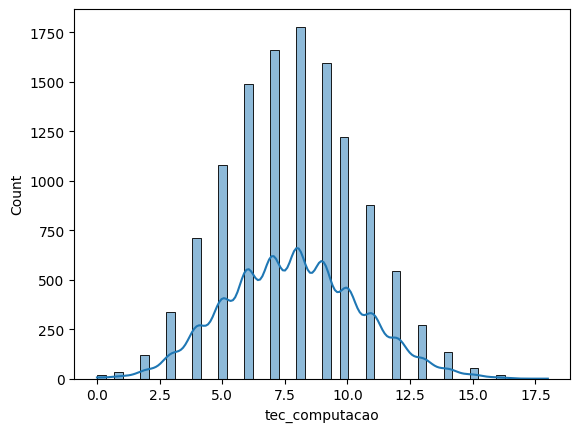

In [9]:
sns.histplot(dados['tec_computacao'], kde=True);

In [ ]:
# dados_presentes['notaTotal'] = dados_presentes[['matematica', 'fund_computacao', 'tec_computacao']].sum(axis=1)
# dados_presentes.head()

In [11]:
dados.loc[:, 'notaTotal'] = dados[['matematica', 'fund_computacao', 'tec_computacao']].sum(axis=1)
dados

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano,notaTotal
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,14.0,21.0,10.0,2016,45.0
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,16.0,22.0,12.0,2016,50.0
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016,28.0
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016,24.0
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,6.0,15.0,11.0,2016,32.0
...,...,...,...,...,...,...,...,...,...,...,...
14711,1997-08-07,masculino,pr,s,mestrado/doutorado,engenharia de software,12.0,18.0,10.0,2023,40.0
14712,1999-10-27,masculino,pi,s,mestrado/doutorado,sistemas de computação,8.0,9.0,3.0,2023,20.0
14716,1998-08-06,masculino,mg,s,mestrado/doutorado,modelagem computacional,14.0,17.0,10.0,2023,41.0
14717,1997-10-17,masculino,sp,s,mestrado/doutorado,Demais áreas,13.0,22.0,7.0,2023,42.0


In [12]:
novo_df = dados[['estado', 'notaTotal']]

In [14]:
novo_df.to_csv('dados_poscomp.csv', index=False)